In [25]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 

In [26]:
#atac_enrich = pd.read_csv('/gpfs/ysm/project/girgenti/cl2553/C2C/figA-C2C_overview/subclass_markerExpr.csv')
atac_enrich = pd.read_csv('subclass_markerExpr.csv')

In [27]:
atac_enrich = atac_enrich[atac_enrich.columns]

In [28]:
atac_enrich = atac_enrich.rename(columns={'Unnamed: 0': 'featurekey'})

In [29]:
atac_enrich

,featurekey,Astro,Endo,Micro/PVM,Oligo,OPC,VLMC,Chandelier,Lamp5,Lamp5 Lhx6,...,Sst Chodl,Vip,L2/3 IT,L4 IT,L5,L5/6 NP,L6 CT,L6 IT,L6 IT Car3,L6b
0,AQP4,5.107606,0.214848,0.044811,0.005427,0.098787,0.072322,0.018561,0.014802,0.159017,...,0.000000,0.038985,0.219564,0.152526,0.160034,0.055188,0.048872,0.272894,0.115805,0.134217
1,GJA1,5.344326,0.668854,0.043539,0.006986,0.038417,0.992577,0.018045,0.000000,0.000000,...,0.261544,0.013516,0.005202,0.013178,0.013096,0.012910,0.000000,0.025093,0.022420,0.044472
2,FLT1,0.019722,7.113762,0.225795,0.013444,0.029086,0.666089,0.027327,0.029052,0.023331,...,0.000000,0.206634,0.029770,0.030349,0.037698,0.030504,0.013225,0.033805,0.048771,0.038203
3,CLDN5,0.022230,8.267983,0.000000,0.000898,0.000000,0.644394,0.000000,0.018884,0.000000,...,0.000000,0.000000,0.001231,0.001011,0.001979,0.000000,0.005244,0.000729,0.000000,0.081876
4,APBB1IP,0.025736,0.000000,5.724475,0.013072,0.050976,0.043177,0.065687,0.086505,0.107633,...,0.000000,0.022442,0.020717,0.037966,0.040057,0.093354,0.027781,0.032043,0.022779,0.046492
5,CX3CR1,0.004952,0.000000,2.183509,0.002329,0.013983,0.096781,0.000000,0.006259,0.000000,...,0.000000,0.005599,0.002346,0.001064,0.003172,0.008529,0.000000,0.003414,0.000000,0.004906
6,MOBP,0.071930,0.000000,0.065947,4.613994,0.027112,0.086639,0.016288,0.115769,0.092853,...,0.814053,0.029164,0.103665,0.134773,0.203940,0.315657,0.096971,0.200180,0.165093,0.134327
7,MOG,0.032972,0.000000,0.027564,2.731761,0.165935,0.037192,0.017448,0.050342,0.048170,...,0.592835,0.018005,0.006370,0.011783,0.029650,0.025306,0.014351,0.022056,0.031244,0.027128
8,OLIG1,0.529334,0.000000,0.047078,2.149786,4.914653,0.037192,0.068434,0.040428,0.018966,...,0.265748,0.058404,0.007111,0.023481,0.041437,0.070178,0.039952,0.023357,0.032081,0.052737
9,OLIG2,0.141791,0.000000,0.018126,0.893650,3.323763,0.000000,0.000000,0.013170,0.008147,...,0.235891,0.010510,0.004751,0.011505,0.017073,0.038492,0.024871,0.018124,0.045465,0.013178


In [30]:
atac_enrich = atac_enrich.set_index('featurekey')

In [31]:
# atac_enrich.columns = [x.split(' ')[0].split('_')[0] for x in atac_enrich.columns]

In [32]:
# atac_enrich.index = ['INH','OPC','END','OLI','MIC','AST','EXC']

In [33]:
# atac_enrich = atac_enrich.drop('ENSG00000229544',axis=1)

In [34]:
# atac_enrich = atac_enrich[['RFX2', 'JUNB', 'JUN', 'FOSL2', 'FOS', 'JUND','SMARCC1','FOSL1',
#                            'NHLH2', 'ASCL1', 'TFAP4','TCF12', 'NHLH1', 'LYL1', 'MYOG',
#                            'ZFX', 'NFIX', 'ZNF148', 'ZBTB7A', 'KLF6', 'KLF15',
#                            'SOX9', 'SOX13', 'CTCFL', 'SOX4', 'CTCF',
#                            'KLF5', 'SP1', 'KLF4', 'SP2','EBF1',
#                            'NFIC', 'EN1', 'GBX2','GBX1',
#                            'SPIB', 'SPI1','BCL11A', 'BCL11B', 'SPIC', 'ELF5', 'ELF2']]

In [35]:
# atac_enrich = atac_enrich.reindex(['EXC','INH','OPC','OLI','END','AST','MIC'])

In [36]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

parameterToColorBy = np.linspace(5, 10, 6, dtype=float)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

minColor = .8
maxColor = 0
blue = truncate_colormap(plt.get_cmap("Blues_r"), minColor, maxColor)

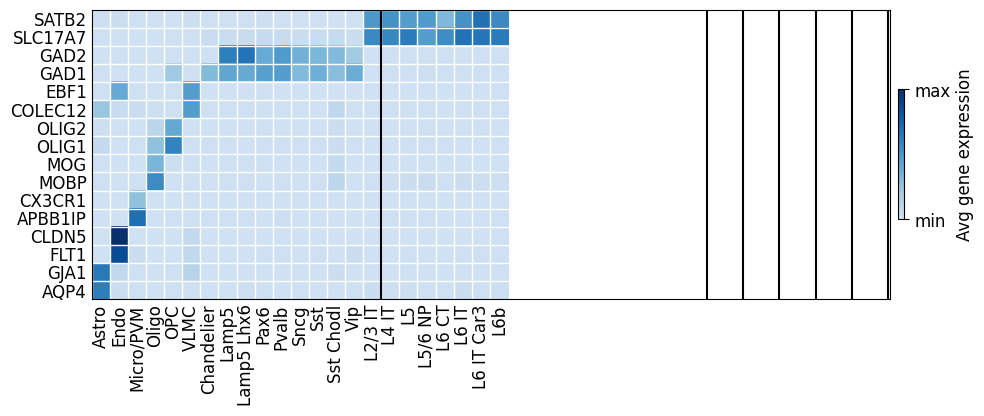

In [37]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '12'
fig, ax = plt.subplots(1,1, figsize=(10,10), sharey=True)

enrich = atac_enrich[::-1]
img = ax.imshow(np.array(enrich),cmap=blue)

#x_labels = ['EXC','INH','END','OPC','MIC','OLI','AST']
x_labels = enrich.columns
# y_labels = ['ExN','InN','OPC','Oligo','Endo','Astro','MG'][::-1]
y_labels = atac_enrich.index.to_list()[::-1]
#ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(enrich.columns)))
ax.set_xticklabels(x_labels,rotation=90)
ax.set_yticks(np.arange(len(enrich.index)))
ax.set_yticklabels(y_labels)
ax.set_aspect(aspect=1)
ax.set_xticks(np.arange(-0.5, enrich.shape[1]-1),minor=True)
ax.set_yticks(np.arange(-0.5, enrich.shape[0]-1),minor=True)
ax.grid(which='minor', color='white', linewidth=1)
ax.grid(which='major',linewidth=0)
ax.tick_params(axis=u'both', which=u'both',length=0)

cb = fig.colorbar(img,fraction=0.008,pad=0.01,location='right')
cb.ax.set_ylabel('Avg gene expression',fontsize=12)
# cb.set_ticks([0,50,100])
cb.set_ticks([atac_enrich.min().min(), atac_enrich.max().max()])
cb.ax.set_yticklabels(['min', 'max'])
cb.ax.tick_params(rotation=0)

for g in [16,34,36,38,40,42,44]:
    ax.axvline(x=g-0.5,color='k')
        
fig.tight_layout()
plt.savefig('TF_motifs_heatmap.pdf',bbox_inches='tight',dpi=300)